In [4]:
import selenium
import pandas as pd
from selenium import webdriver
import time
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

import warnings
warnings.filterwarnings("ignore")

In [41]:
driver = webdriver.Chrome(r"C:\Users\ponmani manoharan\Desktop\Data Trained\Internship\web scrapping\2\chromedriver.exe")

# QUESTION 1 AND QUESTION 2

In [12]:

#function to avoid stale element exception
def refresh():
    search_icon = driver.find_element_by_id("nav-search-submit-button")
    search_icon.click()
    time.sleep(3)


def one_two():
    url = "https://www.amazon.in/"
    driver.get(url)
    time.sleep(3)
    #declare empty lists
    product_name = []
    rating = []
    no_rating = []
    price = []
    exchange = []
    expected_delivery = []
    availability = []
    bottle = []
    #starting with the scraping process
   #search the procuct using id
    search_prod = driver.find_element_by_id("twotabsearchtextbox")
    search_prod.send_keys("bottle")
    time.sleep(3)
    #click on search button
    search_icon = driver.find_element_by_id("nav-search-submit-button")
    search_icon.click()
    time.sleep(3)
    urls=driver.find_elements_by_xpath("//a[@class='a-link-normal a-text-normal']")
    for i in urls:
        bottle.append(i.get_attribute('href'))
    
    
    #using loop to get the ratings
    for x in bottle:
        driver.get(x)
        try:
            rate = driver.find_element_by_xpath("//span[@class='a-size-medium a-color-base']")
            rating.append(rate.text)
        except NoSuchElementException:
            rating.append("--") 
    time.sleep(5)
    refresh()
    for x in bottle:
        driver.get(x)
        try:
            product = driver.find_element_by_xpath("//span[@class='a-size-large product-title-word-break']")
            product_name.append(product.text)
        except NoSuchElementException:
            product_name.append("--")
    time.sleep(5)
    refresh()
    for x in bottle:
        driver.get(x)
        try:
            no = driver.find_element_by_xpath("//span[@class='a-size-base a-color-secondary']")
            no_rating.append(no.text)
        except NoSuchElementException:
            no_rating.append("--")
    time.sleep(5)
    refresh()
    for x in bottle:
        driver.get(x)
        try:
            p = driver.find_element_by_xpath("//span[@class='a-size-medium a-color-price priceBlockBuyingPriceString']")
            price.append(p.text)
        except NoSuchElementException:
            price.append("--")
    time.sleep(5)
    refresh()
    for x in bottle:
        driver.get(x)
        try:
            e = driver.find_element_by_xpath("//a[@class='a-size-small a-link-normal a-text-normal']")
            exchange.append(e.text)
        except NoSuchElementException:
            exchange.append("--")
    time.sleep(5)
    refresh()
    for x in bottle:
        driver.get(x)
        try:
            exe = driver.find_element_by_xpath("//div[@class='a-section a-spacing-mini']/b")
            expected_delivery.append(exe.text)
        except NoSuchElementException:
             expected_delivery.append("--")
    time.sleep(5)
    refresh()
    for x in bottle:
        driver.get(x)
        try:
            avail = driver.find_element_by_xpath("//span[@class='a-size-medium a-color-success']")
            availability.append(avail.text)
        except NoSuchElementException:
             availability.append("--")
    time.sleep(5)
    return dict(product_name = product_name, rating= rating, no_rating=no_rating, price=price,  exchange= exchange, expected_delivery=expected_delivery, availability=availability, product_url = bottle )
    
    
    

    

In [13]:
# get the dictionary
answer_one_two = one_two()
#create pandas data frame
Question_one_two =  pd.DataFrame(dict([(keys, pd.Series(values)) for keys, values in answer_one_two.items()]))


In [14]:
Question_one_two

,product_name,rating,no_rating,price,exchange,expected_delivery,availability,product_url
0,Amazon Brand - Solimo Water Bottle Set (3 Piec...,4.1 out of 5,247 global ratings,₹ 349.00,10 Days Returnable,"Monday, June 7",In stock.,https://www.amazon.in/gp/slredirect/picassoRed...
1,Amazon Brand - Solimo Plastic Fridge Water Bot...,4.4 out of 5,"9,255 global ratings",₹ 449.00,10 Days Returnable,"Monday, June 7",In stock.,https://www.amazon.in/gp/slredirect/picassoRed...
2,Sizzle 750 ml Modern Stainless Steel Water Bot...,--,--,₹ 880.00,10 Days Returnable,"Saturday, June 12",In stock.,https://www.amazon.in/gp/slredirect/picassoRed...
3,Oliveware Teso Lunch Box with Bottle - Black |...,4.3 out of 5,"4,460 global ratings",₹ 950.00,10 Days Returnable,"Wednesday, June 9",In stock.,https://www.amazon.in/gp/slredirect/picassoRed...
4,"Cello Venice Plastic Bottle Set, 1 Litre, Set ...",4.4 out of 5,"13,907 global ratings",₹ 399.00,10 Days Returnable,"Monday, June 7",In stock.,https://www.amazon.in/Cello-Venice-Plastic-Bot...
...,...,...,...,...,...,...,...,...
60,"Milton Copperas 1000 Copper Bottle, 920 ml, 1 ...",3.8 out of 5,"2,246 global ratings",₹ 769.00,10 Days Returnable,"Monday, June 7",In stock.,https://www.amazon.in/Milton-Copper-Bottle-Lit...
61,"InstaCuppa Thermos Bottle 1000 mL, Double-Wall...",4.4 out of 5,930 global ratings,"₹ 1,199.00",10 Days Returnable,"Friday, June 4",In stock.,https://www.amazon.in/gp/slredirect/picassoRed...
62,Optimus Smart Buy Diamond Shape Designer Water...,4.1 out of 5,10 global ratings,₹ 399.00,10 Days Returnable,"Friday, June 11",In stock.,https://www.amazon.in/gp/slredirect/picassoRed...
63,"Cello Puro Sports Bottle Set, 900ml, Set of 2,...",4 out of 5,"1,318 global ratings",₹ 269.00,10 Days Returnable,"Friday, June 4",In stock.,https://www.amazon.in/gp/slredirect/picassoRed...


In [28]:
url = "https://www.amazon.in/"
driver.get(url)
time.sleep(3)
search_prod = driver.find_element_by_id("twotabsearchtextbox")
search_prod.send_keys("bottle")
time.sleep(3)
#click on search button
search_icon = driver.find_element_by_id("nav-search-submit-button")
search_icon.click()
time.sleep(3)
page_urls = []
nxt_page = driver.find_elements_by_xpath("//li[@class='a-normal']/a")
for i in nxt_page:
    page_urls.append(i.get_attribute('href'))  

In [21]:
page_urls

['https://www.amazon.in/s?k=bottle&page=2&qid=1622624162&ref=sr_pg_2',
 'https://www.amazon.in/s?k=bottle&page=3&qid=1622624162&ref=sr_pg_3']

In [39]:
def one_two_2(url):
    driver.get(url)
    time.sleep(3)
    #declare empty lists
    product_name = []
    rating = []
    no_rating = []
    price = []
    exchange = []
    expected_delivery = []
    availability = []
    bottle = []
    urls=driver.find_elements_by_xpath("//a[@class='a-link-normal a-text-normal']")
    for i in urls:
        bottle.append(i.get_attribute('href'))
   
      
    #using loop to get the ratings
    for x in bottle:
        driver.get(x)
        try:
            rate = driver.find_element_by_xpath("//span[@class='a-size-medium a-color-base']")
            rating.append(rate.text)
        except NoSuchElementException:
            rating.append("--") 
    time.sleep(5)
    refresh()
    for x in bottle:
        driver.get(x)
        try:
            product = driver.find_element_by_xpath("//span[@class='a-size-large product-title-word-break']")
            product_name.append(product.text)
        except NoSuchElementException:
            product_name.append("--")
    time.sleep(5)
    refresh()
    for x in bottle:
        driver.get(x)
        try:
            no = driver.find_element_by_xpath("//span[@class='a-size-base a-color-secondary']")
            no_rating.append(no.text)
        except NoSuchElementException:
            no_rating.append("--")
    time.sleep(5)
    refresh()
    for x in bottle:
        driver.get(x)
        try:
            p = driver.find_element_by_xpath("//span[@class='a-size-medium a-color-price priceBlockBuyingPriceString']")
            price.append(p.text)
        except NoSuchElementException:
            price.append("--")
    time.sleep(5)
    refresh()
    for x in bottle:
        driver.get(x)
        try:
            e = driver.find_element_by_xpath("//a[@class='a-size-small a-link-normal a-text-normal']")
            exchange.append(e.text)
        except NoSuchElementException:
            exchange.append("--")
    time.sleep(5)
    refresh()
    for x in bottle:
        driver.get(x)
        try:
            exe = driver.find_element_by_xpath("//div[@class='a-section a-spacing-mini']/b")
            expected_delivery.append(exe.text)
        except NoSuchElementException:
             expected_delivery.append("--")
    time.sleep(5)
    refresh()
    for x in bottle:
        driver.get(x)
        try:
            avail = driver.find_element_by_xpath("//span[@class='a-size-medium a-color-success']")
            availability.append(avail.text)
        except NoSuchElementException:
             availability.append("--")
    time.sleep(5)
    return dict(product_name = product_name, rating= rating, no_rating=no_rating, price=price,  exchange= exchange, expected_delivery=expected_delivery, availability=availability, product_url = bottle )
    
    
    
    
    

In [42]:
# get the dictionary
answer_one_two_2 = one_two_2(page_urls[0])
#create pandas data frame
Question_one_two_2 =  pd.DataFrame(dict([(keys, pd.Series(values)) for keys, values in answer_one_two_2.items()]))


In [43]:
Question_one_two_2 

,product_name,rating,no_rating,price,exchange,expected_delivery,availability,product_url
0,Cello Puro Steel-X Benz Water Bottle with Inne...,3.6 out of 5,"3,456 global ratings",₹ 487.00,10 Days Returnable,"Saturday, June 5",In stock.,https://www.amazon.in/gp/slredirect/picassoRed...
1,Amazon Brand - Solimo Stainless Steel Insulate...,4.3 out of 5,982 global ratings,₹ 699.00,10 Days Returnable,"Monday, June 7",In stock.,https://www.amazon.in/gp/slredirect/picassoRed...
2,Amazon Brand - Solimo Water Bottle Set (6 Piec...,4.4 out of 5,,₹ 649.00,10 Days Returnable,--,--,https://www.amazon.in/gp/slredirect/picassoRed...
3,Oliveware Teso Lunch Box with Bottle 3 Stainle...,4.3 out of 5,"4,460 global ratings",₹ 950.00,10 Days Returnable,"Monday, June 7",In stock.,https://www.amazon.in/gp/slredirect/picassoRed...
4,"Cello Venice Plastic Water Bottle, 1 Litre, Se...",4.4 out of 5,"1,171 global ratings",₹ 232.00,10 Days Returnable,"Saturday, June 5",In stock.,https://www.amazon.in/Cello-Venice-Plastic-Wat...
5,Speedex Stainless Steel Fridge Water Bottle/Re...,4.2 out of 5,429 global ratings,₹ 407.00,10 Days Returnable,"Tuesday, June 8",In stock.,https://www.amazon.in/Speedex-Stainless-Fridge...
6,"Milton Copperas 1000 Copper Bottle, 920 ml, 1 ...",3.8 out of 5,"2,246 global ratings",₹ 769.00,10 Days Returnable,"Monday, June 7",In stock.,https://www.amazon.in/Milton-Copper-Bottle-Lit...
7,"Tupperware Aquasafe Xtreme Plastic Bottle, 1L,...",4.6 out of 5,957 global ratings,₹ 495.00,10 Days Returnable,June 12 - 13,In stock.,https://www.amazon.in/Tupperware-Aquasafe-Xtre...
8,"H.C Copper Water Bottles, 1000ml, Set of 1, Mu...",3.7 out of 5,209 global ratings,₹ 570.00,10 Days Returnable,June 13 - 14,In stock.,https://www.amazon.in/H-C-Copper-Bottles-1000m...
9,"Hawtkart Glass Bottle, 1000 ml, Transparent, S...",4.4 out of 5,310 global ratings,₹ 95.00,10 Days Returnable,"Friday, June 11",In stock.,https://www.amazon.in/Hawtkart-Glass-Bottle-10...


In [45]:
# get the dictionary
answer_one_two_2 = one_two_2(page_urls[1])
#create pandas data frame
Question_one_two_3 =  pd.DataFrame(dict([(keys, pd.Series(values)) for keys, values in answer_one_two_2.items()]))


In [46]:
Question_one_two_3

,product_name,rating,no_rating,price,exchange,expected_delivery,availability,product_url
0,Amazon Brand - Solimo Water Bottle Set (3 Piec...,4.1 out of 5,247 global ratings,₹ 349.00,10 Days Returnable,"Monday, June 7",In stock.,https://www.amazon.in/gp/slredirect/picassoRed...
1,Cello Puro Steel-X Benz Water Bottle with Inne...,3.6 out of 5,"3,456 global ratings",₹ 471.00,10 Days Returnable,"Saturday, June 5",In stock.,https://www.amazon.in/gp/slredirect/picassoRed...
2,Amazon Brand - Solimo Plastic Fridge Bottle Se...,4.4 out of 5,"9,257 global ratings",₹ 449.00,10 Days Returnable,"Saturday, June 5",In stock.,https://www.amazon.in/gp/slredirect/picassoRed...
3,Fuze Glass Bottle with Pure Copper Filter. (Fl...,3.9 out of 5,46 global ratings,₹ 699.00,10 Days Returnable,June 11 - 16,In stock.,https://www.amazon.in/gp/slredirect/picassoRed...
4,Milton Elfin 750 Thermosteel 24 Hours Hot and ...,5 out of 5,9 global ratings,₹ 813.00,10 Days Returnable,"Tuesday, June 8",In stock.,https://www.amazon.in/Milton-Elfin-Thermosteel...
5,Amazon Brand - Solimo Plastic Water Bottle Set...,3.9 out of 5,401 global ratings,₹ 449.00,10 Days Returnable,"Saturday, June 5",In stock.,https://www.amazon.in/Amazon-Brand-Plastic-Mul...
6,"Warrior A5 Notebook Plastic Bottle, 450 ml (An...",4 out of 5,3 global ratings,₹ 189.00,10 Days Returnable,June 11 - 15,In stock.,https://www.amazon.in/Warrior-Notebook-Plastic...
7,Red Copper 100% Pure Copper Water Diamond Cut ...,--,--,₹ 469.00,10 Days Returnable,June 12 - 13,In stock.,https://www.amazon.in/Red-Copper-Water-Diamond...
8,"Milton Atlantis 900 Thermosteel Water Bottle, ...",4.3 out of 5,"4,520 global ratings",₹ 782.00,10 Days Returnable,"Monday, June 7",In stock.,https://www.amazon.in/Milton-Atlantis-900-Ther...
9,Nike Sports Water Bottle - Black,4.4 out of 5,665 global ratings,₹ 850.00,Returns Policy,"Saturday, June 12",In stock.,https://www.amazon.in/Nike-Sports-Water-Bottle...


In [47]:
Amazon = pd.concat([Question_one_two,Question_one_two_2], ignore_index=True)

In [48]:
Amazon

,product_name,rating,no_rating,price,exchange,expected_delivery,availability,product_url
0,Amazon Brand - Solimo Water Bottle Set (3 Piec...,4.1 out of 5,247 global ratings,₹ 349.00,10 Days Returnable,"Monday, June 7",In stock.,https://www.amazon.in/gp/slredirect/picassoRed...
1,Amazon Brand - Solimo Plastic Fridge Water Bot...,4.4 out of 5,"9,255 global ratings",₹ 449.00,10 Days Returnable,"Monday, June 7",In stock.,https://www.amazon.in/gp/slredirect/picassoRed...
2,Sizzle 750 ml Modern Stainless Steel Water Bot...,--,--,₹ 880.00,10 Days Returnable,"Saturday, June 12",In stock.,https://www.amazon.in/gp/slredirect/picassoRed...
3,Oliveware Teso Lunch Box with Bottle - Black |...,4.3 out of 5,"4,460 global ratings",₹ 950.00,10 Days Returnable,"Wednesday, June 9",In stock.,https://www.amazon.in/gp/slredirect/picassoRed...
4,"Cello Venice Plastic Bottle Set, 1 Litre, Set ...",4.4 out of 5,"13,907 global ratings",₹ 399.00,10 Days Returnable,"Monday, June 7",In stock.,https://www.amazon.in/Cello-Venice-Plastic-Bot...
...,...,...,...,...,...,...,...,...
120,"Cello H2O Bottle , 1 Litre, Set of 3, Colour M...",4.2 out of 5,"7,785 global ratings",₹ 475.00,10 Days Returnable,"Sunday, June 13",In stock.,https://www.amazon.in/Cello-Bottle-Litre-Colou...
121,Amazon Brand - Solimo Glass Bottle Set (6 piec...,4.3 out of 5,"1,017 global ratings",₹ 749.00,10 Days Returnable,"Monday, June 7",In stock.,https://www.amazon.in/gp/slredirect/picassoRed...
122,"SOLARA SOL-WB-201 Tritan Water Bottle, 30 Page...",4.3 out of 5,156 global ratings,--,10 Days Returnable,"Monday, June 7",In stock.,https://www.amazon.in/gp/slredirect/picassoRed...
123,Amazon Brand - Solimo Stainless Steel Insulate...,3.5 out of 5,12 global ratings,₹ 729.00,10 Days Returnable,"Saturday, June 5",In stock.,https://www.amazon.in/gp/slredirect/picassoRed...


In [49]:
Final_dataset = pd.concat([Amazon,Question_one_two_3 ], ignore_index=True)

In [50]:
Final_dataset

,product_name,rating,no_rating,price,exchange,expected_delivery,availability,product_url
0,Amazon Brand - Solimo Water Bottle Set (3 Piec...,4.1 out of 5,247 global ratings,₹ 349.00,10 Days Returnable,"Monday, June 7",In stock.,https://www.amazon.in/gp/slredirect/picassoRed...
1,Amazon Brand - Solimo Plastic Fridge Water Bot...,4.4 out of 5,"9,255 global ratings",₹ 449.00,10 Days Returnable,"Monday, June 7",In stock.,https://www.amazon.in/gp/slredirect/picassoRed...
2,Sizzle 750 ml Modern Stainless Steel Water Bot...,--,--,₹ 880.00,10 Days Returnable,"Saturday, June 12",In stock.,https://www.amazon.in/gp/slredirect/picassoRed...
3,Oliveware Teso Lunch Box with Bottle - Black |...,4.3 out of 5,"4,460 global ratings",₹ 950.00,10 Days Returnable,"Wednesday, June 9",In stock.,https://www.amazon.in/gp/slredirect/picassoRed...
4,"Cello Venice Plastic Bottle Set, 1 Litre, Set ...",4.4 out of 5,"13,907 global ratings",₹ 399.00,10 Days Returnable,"Monday, June 7",In stock.,https://www.amazon.in/Cello-Venice-Plastic-Bot...
...,...,...,...,...,...,...,...,...
180,Milton Kool Zing 900 Insulated Water Bottle fo...,3.6 out of 5,32 global ratings,₹ 207.00,10 Days Returnable,"Tuesday, June 8",In stock.,https://www.amazon.in/Milton-Water-Bottle-Yell...
181,"SOLARA SOL-WB-202 Tritan Water Bottle, 30 Page...",4.3 out of 5,156 global ratings,--,10 Days Returnable,"Monday, June 7",In stock.,https://www.amazon.in/gp/slredirect/picassoRed...
182,"Cello Cop- Pura Good Earth Copper Bottle, 1000...",3.3 out of 5,19 global ratings,"₹ 1,149.00",10 Days Returnable,"Monday, June 7",In stock.,https://www.amazon.in/gp/slredirect/picassoRed...
183,"Cello Cop-Pura Neer Copper Bottle, 1000ml, Cop...",3.8 out of 5,214 global ratings,₹ 799.00,10 Days Returnable,"Monday, June 7",In stock.,https://www.amazon.in/gp/slredirect/picassoRed...


In [ ]:
driver.quit()

# --------------------------------------END OF QUESTION 1 AND 2---------------------------------

# Question-3

In [51]:
import pandas as pd
from IPython.core.display import HTML

In [52]:
driver = webdriver.Chrome(r"C:\Users\ponmani manoharan\Desktop\Data Trained\Internship\web scrapping\2\chromedriver.exe")

In [53]:
#convert the link into HTML code
def html_tag(path):
    return '<img src ="'+ path +'" width="350">'

,car_name
0,
1,
2,
3,
4,
5,
6,
7,
8,
9,

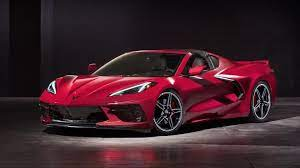
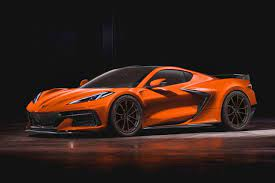
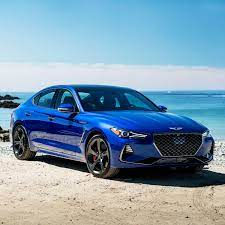
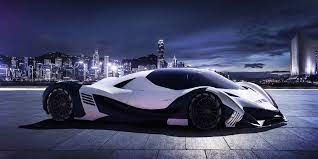
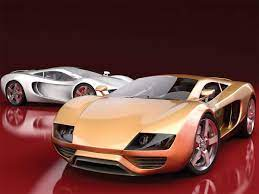
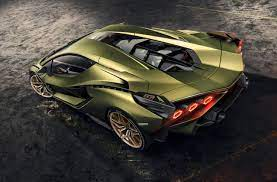
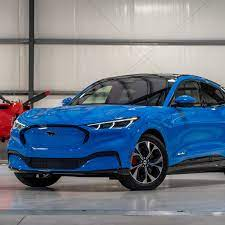
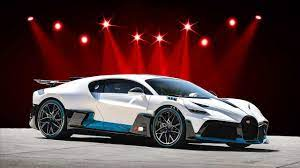
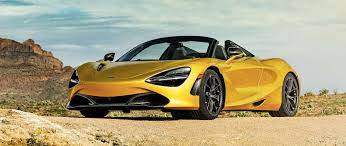
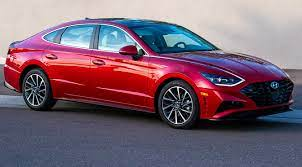
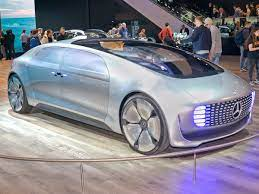
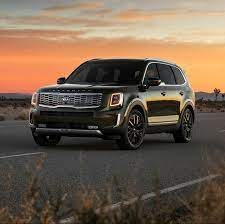
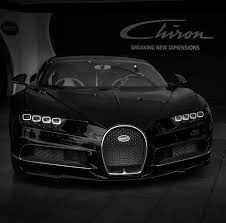
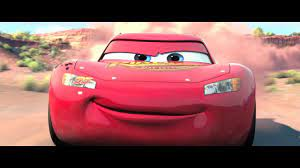
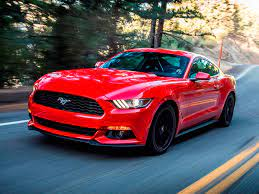
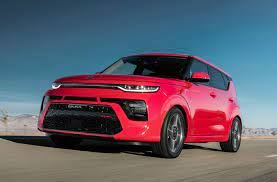
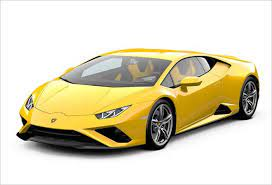
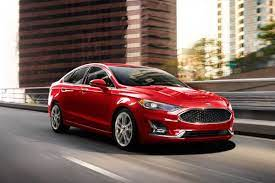
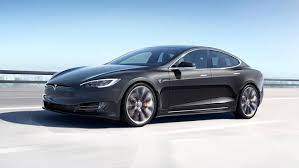
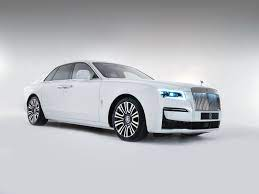

In [54]:
url = "https://images.google.com/?gws_rd=ssl"
driver.get(url)
time.sleep(2)



#search the input box using id
search_image = driver.find_element_by_tag_name("input")
search_image.send_keys('cars')
time.sleep(2)
search_btn = driver.find_element_by_xpath("//button[@class ='Tg7LZd']")
search_btn.click()

time.sleep(3)

src_link = []  
data_link = []
image_links = driver.find_elements_by_class_name('rg_i.Q4LuWd')
for x in range(len(image_links)):
    src_link.append(image_links[x].get_attribute('src'))
time.sleep(3)
for x in range(len(image_links)):
    data_link.append(image_links[x].get_attribute('data-src'))
link = src_link + data_link



df_one = pd.DataFrame()
df_one["car_name"] = link
df_one = df_one[:100]

#rendering the dataframe as HTML table
df_one.to_html(escape=False, formatters =dict(car_name= html_tag))
#rendering the images in the dataframe using the HTML method
cars = HTML(df_one.to_html(escape=False, formatters=dict(car_name= html_tag)))

cars

In [55]:
driver.quit()

,Fruit_images
0,
1,
2,
3,
4,
5,
6,
7,
8,
9,

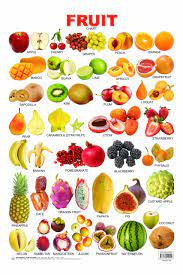
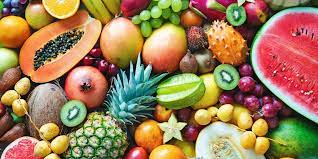
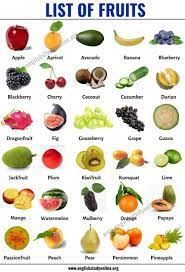
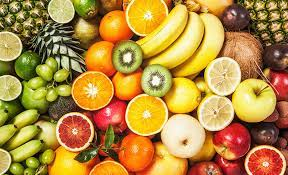
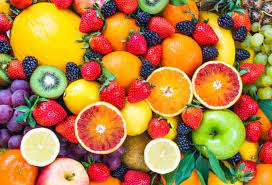
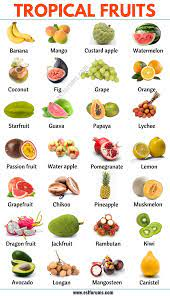
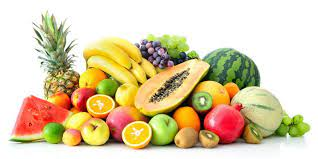
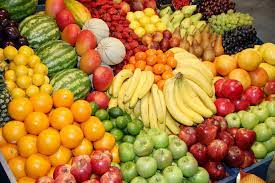
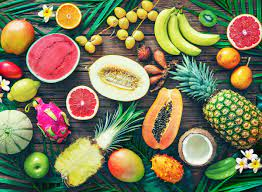
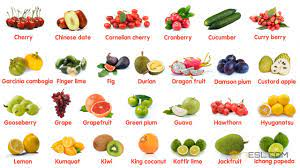
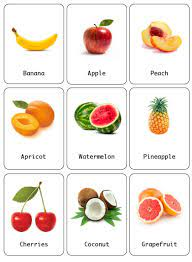
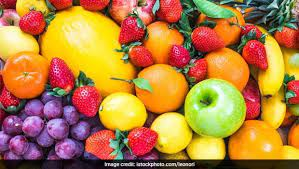
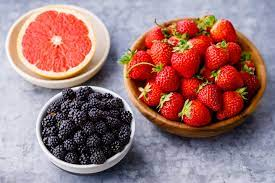
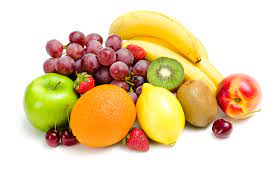
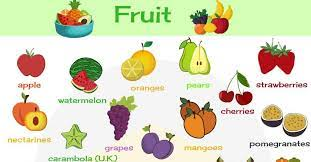
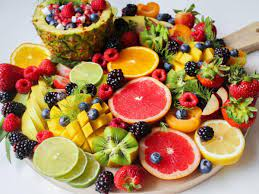
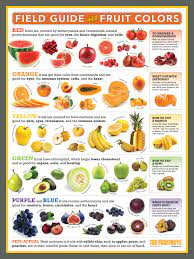
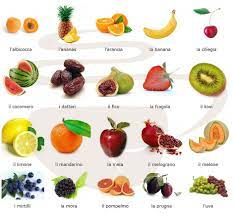
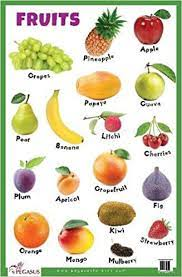
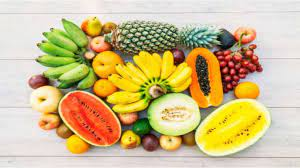

In [57]:
driver = webdriver.Chrome(r"C:\Users\ponmani manoharan\Desktop\Data Trained\Internship\web scrapping\2\chromedriver.exe")
url = "https://images.google.com/?gws_rd=ssl"
driver.get(url)
time.sleep(2)

#search the input box using id
search_image = driver.find_element_by_tag_name("input")
search_image.send_keys("fruits")
time.sleep(2)
search_btn = driver.find_element_by_xpath("//button[@class ='Tg7LZd']")
search_btn.click()
time.sleep(2)

image_links = driver.find_elements_by_class_name('rg_i.Q4LuWd')
src_link = []


for x in range(len(image_links)):
    src_link.append(image_links[x].get_attribute('src'))
    
data_link = []
for x in range(len(image_links)):
    data_link.append(image_links[x].get_attribute('data-src'))
    
links = src_link + data_link


df = pd.DataFrame()
df["Fruit_images"] = links
df = df[:100]
#rendering the dataframe as HTML table
df.to_html(escape=False, formatters =dict(Fruit_images= html_tag))

#rendering the images in the dataframe using the HTML method
fruits = HTML(df.to_html(escape=False, formatters=dict(Fruit_images= html_tag)))

Fruits = fruits

driver.quit()

Fruits

,ML_images
0,
1,
2,
3,
4,
5,
6,
7,
8,
9,

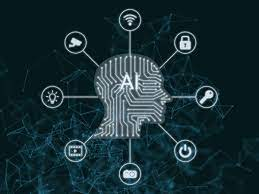
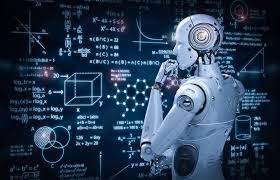
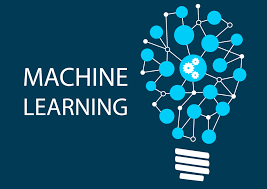
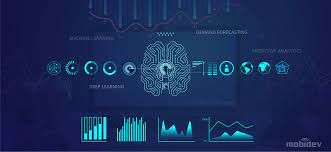
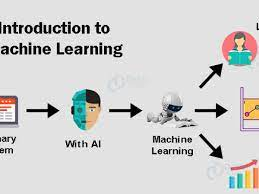
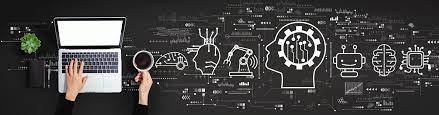
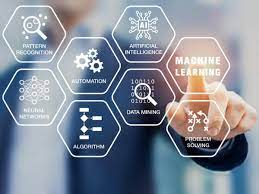
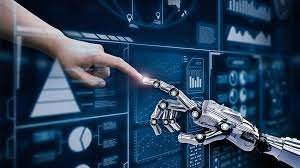
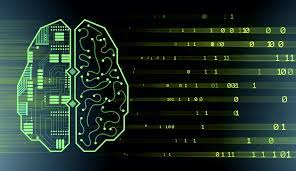
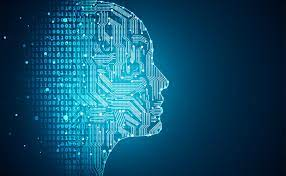
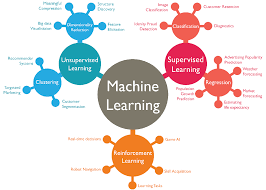
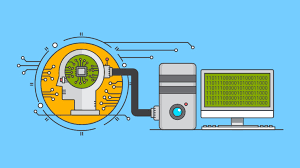
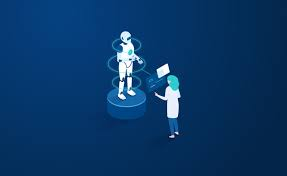
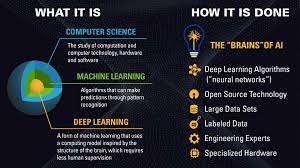
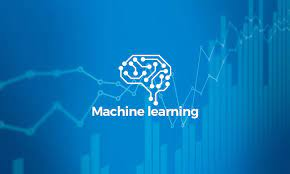
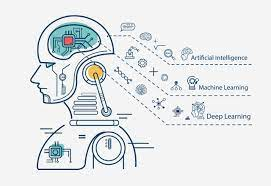
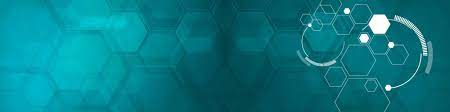
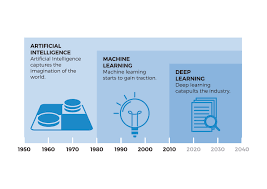
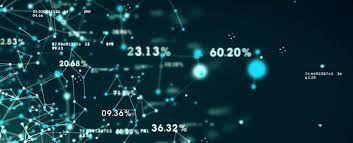
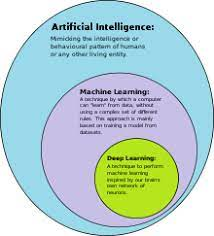

In [58]:
driver = webdriver.Chrome(r"C:\Users\ponmani manoharan\Desktop\Data Trained\Internship\web scrapping\2\chromedriver.exe")
url = "https://images.google.com/?gws_rd=ssl"
driver.get(url)
time.sleep(2)

#search the input box using id
search_image = driver.find_element_by_tag_name("input")
search_image.send_keys("Machine Learning")
time.sleep(2)
search_btn = driver.find_element_by_xpath("//button[@class ='Tg7LZd']")
search_btn.click()
time.sleep(2)

image_links = driver.find_elements_by_class_name('rg_i.Q4LuWd')
src_link = []


for x in range(len(image_links)):
    src_link.append(image_links[x].get_attribute('src'))
    
data_link = []
for x in range(len(image_links)):
    data_link.append(image_links[x].get_attribute('data-src'))
    
links = src_link + data_link


df = pd.DataFrame()
df["ML_images"] = links
df = df[:100]
#rendering the dataframe as HTML table
df.to_html(escape=False, formatters =dict(ML_images= html_tag))

#rendering the images in the dataframe using the HTML method
ML_image = HTML(df.to_html(escape=False, formatters=dict(ML_images= html_tag)))

ML_images= ML_image 

driver. quit()
ML_images

# --------------------------------------END OF QUESTION 3---------------------------------

# Question 4

In [93]:
driver = webdriver.Chrome(r"C:\Users\ponmani manoharan\Desktop\Data Trained\Internship\web scrapping\2\chromedriver.exe")
time.sleep(3)
#get the url
url = "https://www.flipkart.com/"
driver.get(url)
time.sleep(3)

#search products using tag name 
search_product = driver.find_element_by_tag_name("input")
search_product.send_keys("iphone")
time.sleep(3)

#click search button using xpath
search_btn = driver.find_element_by_xpath("//button[@class='L0Z3Pu']")
search_btn.click()

page_urls =[]
brand =[]
new = []
Brand = []
description = []
phone = []
colour = []
ROM = []
price = []

time.sleep(3)
nxt_page = driver.find_elements_by_xpath("//a[@class='_1fQZEK']")
for i in nxt_page:
    page_urls.append(i.get_attribute('href'))
    
#extract brand name
for x in page_urls:
    driver.get(x)
    try:
        brand_name = driver.find_element_by_xpath("//span[@class='B_NuCI']")
        brand.append(brand_name.text)
        #time.sleep(3)
    except NoSuchElementException:
        brand.append("--")

time.sleep(3)

for i in brand:
    new.append(i.split(" "))
for i in new:
    Brand.append(i[0])
    
for x in page_urls:
    driver.get(x)
    try:
        phone_name = driver.find_element_by_xpath("//li[@class='_21lJbe']")
        description .append(phone_name.text)
        #time.sleep(3)
    except NoSuchElementException:
        description .append("--")
time.sleep(3)


#extract brand name
for x in page_urls:
    driver.get(x)
    try:
        phone_names = driver.find_element_by_xpath("//table[@class='_14cfVK']/tbody/tr[3]/td[2]")
        phone.append(phone_names.text)
        #time.sleep(3)
    except NoSuchElementException:
        phone.append("--")

for x in page_urls:
    driver.get(x)
    try:
        colour_names = driver.find_element_by_xpath("//table[@class='_14cfVK']/tbody/tr[4]/td[2]")
        colour.append(colour_names.text)
        #time.sleep(3)
    except NoSuchElementException:
        colour.append("--")
time.sleep(3)
        
for x in page_urls:
    driver.get(x)
    try:
        rom = driver.find_element_by_xpath("//div[@class='_2418kt']")
        ROM.append(rom.text)
        #time.sleep(3)
    except NoSuchElementException:
        ROM.append("--")
time.sleep(3)

ROM = [x.split("\n") for x in ROM]
ROMs = [x[0] for x in ROM]
Camera = [x[2] for x in ROM]
Camera = [x.split("|") for x in Camera]
displays = [x[1] for x in ROM]
processor = [x[3] for x in ROM]

for x in page_urls:
    driver.get(x)
    try:
        pr = driver.find_element_by_xpath("//div[@class='_30jeq3 _16Jk6d']")
        price.append(pr.text)
        #time.sleep(3)
    except NoSuchElementException:
        price.append("--")

time.sleep(3)

        
        
        





In [103]:
values =  dict(Brand = Brand, ROM= ROMs, Camera=Camera, price=price,  Display= displays, Processor=processor, description=description, product_name = phone, colour = colour, product_url = page_urls )

In [104]:
Question_four =  pd.DataFrame(dict([(keys, pd.Series(values)) for keys, values in values.items()]))

In [105]:
Question_four

,Brand,ROM,Camera,price,Display,Processor,description,product_name,colour,product_url
0,APPLE,64 GB ROM,"[12MP + 12MP , 12MP Front Camera]","₹51,999",15.49 cm (6.1 inch) Liquid Retina HD Display,A13 Bionic Chip Processor,This iPhone box does not include a power adapt...,iPhone 11,Black,https://www.flipkart.com/apple-iphone-11-black...
1,--,128 GB ROM,"[12MP Rear Camera , 7MP Front Camera]","₹46,999",15.49 cm (6.1 inch) Display,A12 Bionic Chip Processor,"Handset, EarPods with Lightning Connector, Lig...",iPhone XR,White,https://www.flipkart.com/apple-iphone-xr-white...
2,APPLE,64 GB ROM,"[12MP Rear Camera , 7MP Front Camera]","₹32,999",11.94 cm (4.7 inch) Retina HD Display,A13 Bionic Chip with 3rd Gen Neural Engine Pro...,This iPhone box does not include a power adapt...,iPhone SE,Black,https://www.flipkart.com/apple-iphone-se-black...
3,APPLE,128 GB ROM,"[12MP + 12MP , 12MP Front Camera]","₹84,900",15.49 cm (6.1 inch) Super Retina XDR Display,A14 Bionic Chip with Next Generation Neural En...,"iPhone, USB-C to Lightning Cable, Documentation",iPhone 12,Purple,https://www.flipkart.com/apple-iphone-12-purpl...
4,APPLE,64 GB ROM,"[12MP Rear Camera , 7MP Front Camera]","₹32,999",11.94 cm (4.7 inch) Retina HD Display,A13 Bionic Chip with 3rd Gen Neural Engine Pro...,This iPhone box does not include a power adapt...,iPhone SE,White,https://www.flipkart.com/apple-iphone-se-white...
5,APPLE,64 GB ROM,"[12MP Rear Camera , 7MP Front Camera]","₹32,999",11.94 cm (4.7 inch) Retina HD Display,A13 Bionic Chip with 3rd Gen Neural Engine Pro...,This iPhone box does not include a power adapt...,iPhone SE,Red,https://www.flipkart.com/apple-iphone-se-red-6...
6,Apple,128 GB ROM,"[12MP Rear Camera , 7MP Front Camera]","₹46,999",15.49 cm (6.1 inch) Display,A12 Bionic Chip Processor,"Handset, EarPods with Lightning Connector, Lig...",iPhone XR,Black,https://www.flipkart.com/apple-iphone-xr-black...
7,APPLE,128 GB ROM,"[12MP Rear Camera , 7MP Front Camera]","₹37,999",11.94 cm (4.7 inch) Retina HD Display,A13 Bionic Chip with 3rd Gen Neural Engine Pro...,This iPhone box does not include a power adapt...,iPhone SE,Black,https://www.flipkart.com/apple-iphone-se-black...
8,APPLE,64 GB ROM,"[12MP + 12MP , 12MP Front Camera]","₹51,999",15.49 cm (6.1 inch) Liquid Retina HD Display,A13 Bionic Chip Processor,This iPhone box does not include a power adapt...,iPhone 11,Red,https://www.flipkart.com/apple-iphone-11-red-6...
9,APPLE,64 GB ROM,"[12MP Rear Camera , 7MP Front Camera]","₹41,999",15.49 cm (6.1 inch) Display,A12 Bionic Chip Processor,This iPhone box does not include a power adapt...,iPhone XR,Black,https://www.flipkart.com/apple-iphone-xr-black...


# --------------------------------------END OF QUESTION 4 ---------------------------------

# Question 5

In [113]:
driver = webdriver.Chrome(r"C:\Users\ponmani manoharan\Desktop\Data Trained\Internship\web scrapping\2\chromedriver.exe")

#get the url
url = "https://www.google.com/maps/"
driver.get(url)
time.sleep(3)

#search the procuct using id
search_prod = driver.find_element_by_tag_name("input")
search_prod.send_keys("Bangalore")
time.sleep(3)

#click on search button
search_icon = driver.find_element_by_xpath("//button[@class='searchbox-searchbutton']")
search_icon.click()
time.sleep(3)



In [126]:

try:
    geospatial = driver.find_element_by_xpath("//*[@id='action-menu']/ul/li[1]/div[3]/div[1]")
except NoSuchElementException:
    print("error")
    


In [127]:
lati_logi = geospatial.text

In [128]:
lati_logi

'12.99199, 77.55878'

In [129]:
driver.quit()

# --------------------------------------END OF QUESTION 5---------------------------------

# Question 6

Write a program to scrap details of all the funding deals for second quarter (i.e. July 20 –
September 20) fromm trak.in.

Unable to find the link got 404 error. So, no further attempts were made to scrape the website.

# --------------------------------------END OF QUESTION 6--------------------------------

# Question 7

In [25]:
from selenium.webdriver.common.keys import Keys

In [33]:
driver = webdriver.Chrome(r"C:\Users\ponmani manoharan\Desktop\Data Trained\Internship\web scrapping\2\chromedriver.exe")

In [34]:
page = []
new_s = []
Market_Status = []
Release_Date = []
Official_Website = []
Digit_Rating = []
Price = []
OS =[]
Display_spec = []
Processor = []
brief_review = []
Memory = []
Model = []

In [35]:
# Get the url of digit.in 
url = "https://www.digit.in/"
driver.get(url)
time.sleep(3)

#search the content using click() method and continue search with the Key.Enter
click = driver.find_element_by_xpath("//div[@class='search']").click()
enter = driver.find_element_by_xpath("//div[@class='top-serch']/input")
press = enter.send_keys("Top 10 gaming laptops")
time.sleep(3)
#Enter key pressed after send key
enter.send_keys(Keys.ENTER)
time.sleep(3)

#collect the href of each laptop
for x in driver.find_elements_by_xpath("//ul[@class='pagination']/li/a"):
    page.append(x.get_attribute("href"))
page = page[:2]
#collecting all the links
for x in page:
    for i in driver.find_elements_by_xpath("//div[@class='searchPage']/a"):
        new_s.append(i.get_attribute("href"))


new_s = new_s[:19]
new_s = new_s[0:10]

time.sleep(2)

for x in new_s:
    driver.get(x)
    time.sleep(2)
    try:
        market = driver.find_element_by_xpath("//div[@class='status-bar only-desktop']/div[1]/b")
        Market_Status.append(market.text)
        time.sleep(2)
    except NoSuchElementException:
        Market_Status.append("--")
time.sleep(5)

for x in new_s:
    driver.get(x)
    time.sleep(2)
    try:
        date= driver.find_element_by_xpath("//div[@class='status-bar only-desktop']/div[2]/b")
        Release_Date.append(date.text)
        time.sleep(2)
    except NoSuchElementException:
        Release_Date.append("--")
time.sleep(5)

for x in new_s:
    driver.get(x)
    time.sleep(2)
    try:
        web= driver.find_element_by_xpath("//div[@class='status-bar only-desktop']/div[3]/b")
        Official_Website.append(web.text)
        time.sleep(2)
    except NoSuchElementException:
        Official_Website.append("--")
time.sleep(5)

for x in new_s:
    driver.get(x)
    time.sleep(2)
    try:
        digital= driver.find_element_by_xpath("//div[@class='Review-reting']/div[1]")
        Digit_Rating.append(digital.text)
        time.sleep(2)
    except NoSuchElementException:
        Digit_Rating.append("--")
time.sleep(5)

for x in new_s:
    driver.get(x)
    time.sleep(2)
    try:
        p= driver.find_element_by_xpath("//div[@class='Block-price']/b")
        Price.append(p.text)
        time.sleep(2)
    except NoSuchElementException:
        Price.append("--")

time.sleep(5)

for x in new_s:
    driver.get(x)
    time.sleep(3)
    try:
        o= driver.find_element_by_xpath("//div[@class='Specs-Wrap  notspecs ']/ul/li[1]/div")
        OS.append(o.text)
        time.sleep(3)
    except NoSuchElementException:
        OS.append("--")

time.sleep(5)

for x in new_s:
    driver.get(x)
    time.sleep(2)
    try:
        d= driver.find_element_by_xpath("//div[@class='Specs-Wrap  notspecs ']/ul/li[2]/div")
        Display_spec.append(d.text)
        time.sleep(2)
    except NoSuchElementException:
        Display_spec.append("--")
time.sleep(5)
for x in new_s:
    driver.get(x)
    time.sleep(2)
    try:
        pr= driver.find_element_by_xpath("//div[@class='Specs-Wrap  notspecs ']/ul/li[3]/div")
        Processor.append(pr.text)
        time.sleep(2)
    except NoSuchElementException:
        Processor.append("--")
time.sleep(5)
for x in new_s:
    driver.get(x)
    time.sleep(2)
    try:
        m= driver.find_element_by_xpath("//div[@class='Specs-Wrap  notspecs ']/ul/li[4]/div")
        Memory.append(m.text)
        time.sleep(2)
    except NoSuchElementException:
        Memory.append("--")
time.sleep(5)

for x in new_s:
    driver.get(x)
    time.sleep(2)
    try:
        b= driver.find_element_by_id("MoreLink_content-container-new")
        brief_review.append(b.text)
        time.sleep(2)
    except NoSuchElementException:
        brief_review.append("--")
time.sleep(5)

for x in new_s:
    driver.get(x)
    time.sleep(2)
    try:
        mo= driver.find_element_by_xpath("//div[@class='heading-wraper']/h1")
        Model.append(mo.text)
        time.sleep(2)
    except NoSuchElementException:
        Model.append("--")









In [36]:
seven =  dict(
    Model = Model,
    Page_Url = new_s,
    Market_Status =  Market_Status,
    Release_Date = Release_Date,
    Official_Website = Official_Website,
    Digit_Rating = Digit_Rating,
    Price = Price,
    OS = OS,
    Display_spec = Display_spec,
    Processor = Processor,
    brief_review = brief_review,
    Memory = Memory)

In [37]:
Question_seven =  pd.DataFrame(dict([(keys, pd.Series(values)) for keys, values in seven.items()]))

In [38]:
Question_seven 

,Model,Page_Url,Market_Status,Release_Date,Official_Website,Digit_Rating,Price,OS,Display_spec,Processor,brief_review,Memory
0,HP Envy 15-K006tx,https://www.digit.in/laptops/hp-envy-15-k006tx...,LAUNCHED,"14 Oct, 2014",HP,--,"80,510",NA,NA,NA,Another heavy duty gaming laptop that bludgeon...,--
1,ASUS G53J - A 3D Gamer'S Delight But We Want More,https://www.digit.in/laptops/asus-g53j-a-3d-ga...,LAUNCHED,"13 Jan, 2011",Asus,70,"112,499",NA,NA,NA,The ASUS G53J does not compare well with any o...,--
2,Asus G750JX-CV069P,https://www.digit.in/laptops/asus-g750jx-cv069...,LAUNCHED,"14 Oct, 2014",Asus,--,"149,999",NA,NA,NA,"Another, no-holds barred, uninterrupted gaming...",--
3,ASUS ROG Flow X13,https://www.digit.in/laptops/asus-rog-flow-x13...,LAUNCHED,"05 May, 2021",Asus,68,"154,990",Windows 10 Pro,"13.4"" (3840 X 2400)",AMD Ryzen™ 9 5980HS Processor 3.1 GHz | NA,ASUS unleashed a series of laptops recently in...,16GB*2 LPDDR4X/4 GBGB GDDR6
4,Lenovo IdeaPad Y570,https://www.digit.in/laptops/lenovo-ideapad-y5...,LAUNCHED,"07 Feb, 2012",Lenovo,90,"49,900",Windows 7 (64-Bit),"15.6"" (1366 X 768)",Intel Core I7 (2nd Generation) | 2 Ghz,The Lenovo IdeaPad Y570 is a solid home entert...,750 GB NA/6GB DDR3
5,ASUS ROG Cetra,https://www.digit.in/audio-video/asus-rog-cetr...,LAUNCHED,"22 Aug, 2020",Asus,70,"7,699",NA,NA,NA,After the immense popularisation of wireless h...,NA
6,HP Pavilion G6 - Multimedia And Gaming On A Bu...,https://www.digit.in/laptops/hp-pavilion-g6-mu...,LAUNCHED,"04 May, 2011",HP,70,"45,000",NA,NA,NA,The HP Pavilion g6 is aimed at the casual game...,--
7,MSI Z170A Gaming M7,https://www.digit.in/pc-components/msi-z170a-g...,LAUNCHED,"05 Aug, 2015",MSI,83,"19,999",--,--,--,"Chipset - Intel Z170,\nMemory support - 4x3600...",--
8,ASUS Zephyrus G15 Ryzen 9 5900HS (2021),https://www.digit.in/laptops/asus-zephyrus-g15...,LAUNCHED,"26 May, 2021",Asus,79,"137,990",Windows 10 Home,"15.6"" (2560 X 1440)",AMD Ryzen™ 9 5900HS | NA,Alongside the ROG Flow x13 convertible gaming ...,1 TB SSD/8 GBGB DDR4
9,Top gaming laptops under Rs 1 lakh,https://www.digit.in/features/laptops/top-3-ga...,--,--,--,--,--,--,--,--,--,--


In [32]:
driver.quit()

# --------------------------------------END OF ASSIGNMENT-----------------------------------